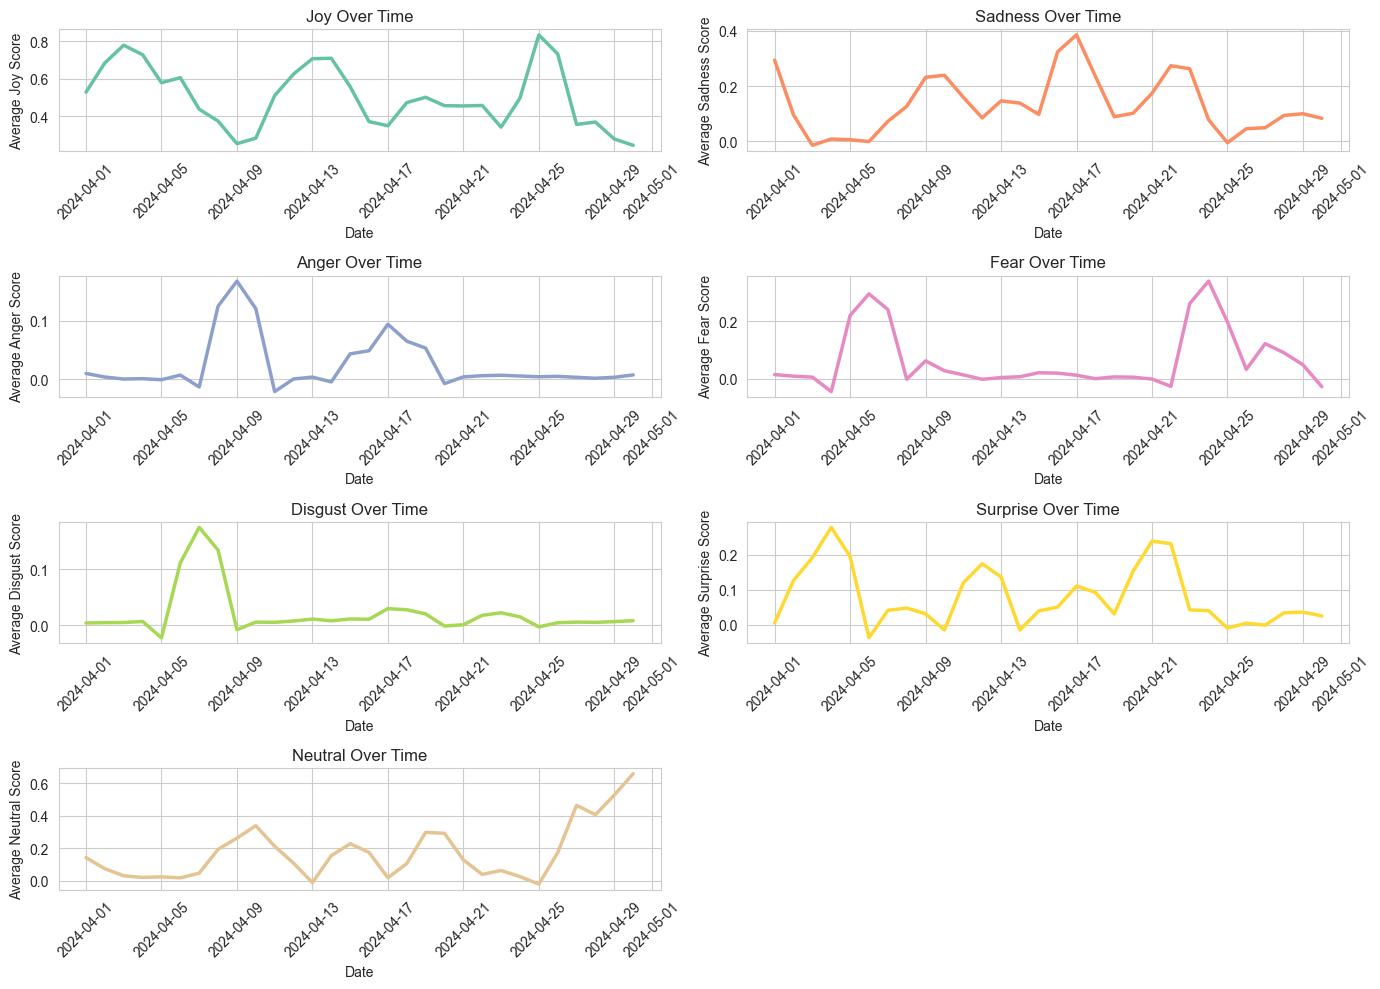

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

# Load the dataset
df = pd.read_csv("/Users/pandhari/ai-diary-project/diary_entries.csv")

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# List of mood columns
moods = ["Joy", "Sadness", "Anger", "Fear", "Disgust", "Surprise", "Neutral"]

# Group by Date and calculate the mean score for each mood
daily_mood_avg = df.groupby("Date")[moods].mean()

# Apply smoothing using Savitzky-Golay filter
window_size = 5  # Controls smoothness (adjust based on data size)
poly_order = 2   # Polynomial order for the filter
daily_mood_smooth = daily_mood_avg.apply(lambda x: savgol_filter(x, window_size, poly_order) if len(x) > window_size else x)

# Plot each mood separately
plt.figure(figsize=(14, 10))

for i, mood in enumerate(moods):
    plt.subplot(4, 2, i+1)  # Arrange in subplots (4 rows, 2 columns)
    sns.lineplot(x=daily_mood_smooth.index, y=daily_mood_smooth[mood], linewidth=2.5, color=sns.color_palette("Set2")[i])
    plt.title(f"{mood} Over Time")
    plt.xlabel("Date")
    plt.ylabel(f"Average {mood} Score")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

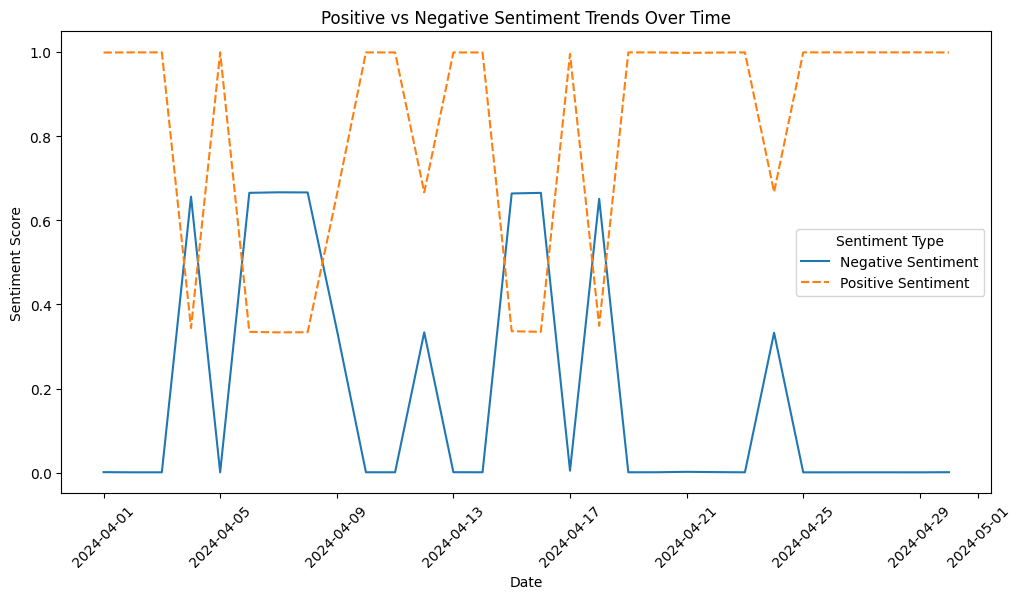

In [5]:
# Aggregate sentiment over time
sentiment_trends = df.groupby("Date")[["Negative Sentiment", "Positive Sentiment"]].mean()

# Plot Sentiment Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends)
plt.title("Positive vs Negative Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.legend(title="Sentiment Type")
plt.show()

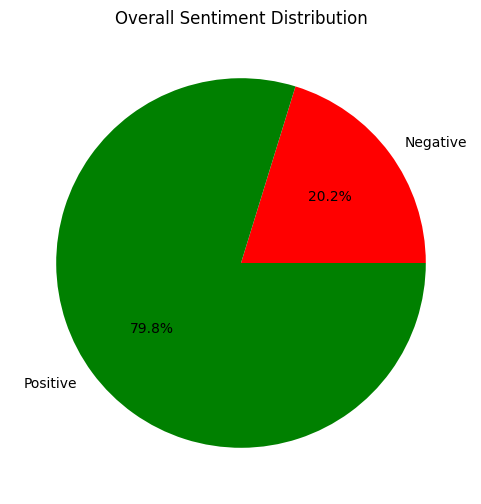

In [6]:
# Calculate overall sentiment distribution
sentiment_sums = df[["Negative Sentiment", "Positive Sentiment"]].sum()

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_sums, labels=["Negative", "Positive"], autopct="%1.1f%%", colors=["red", "green"])
plt.title("Overall Sentiment Distribution")
plt.show()

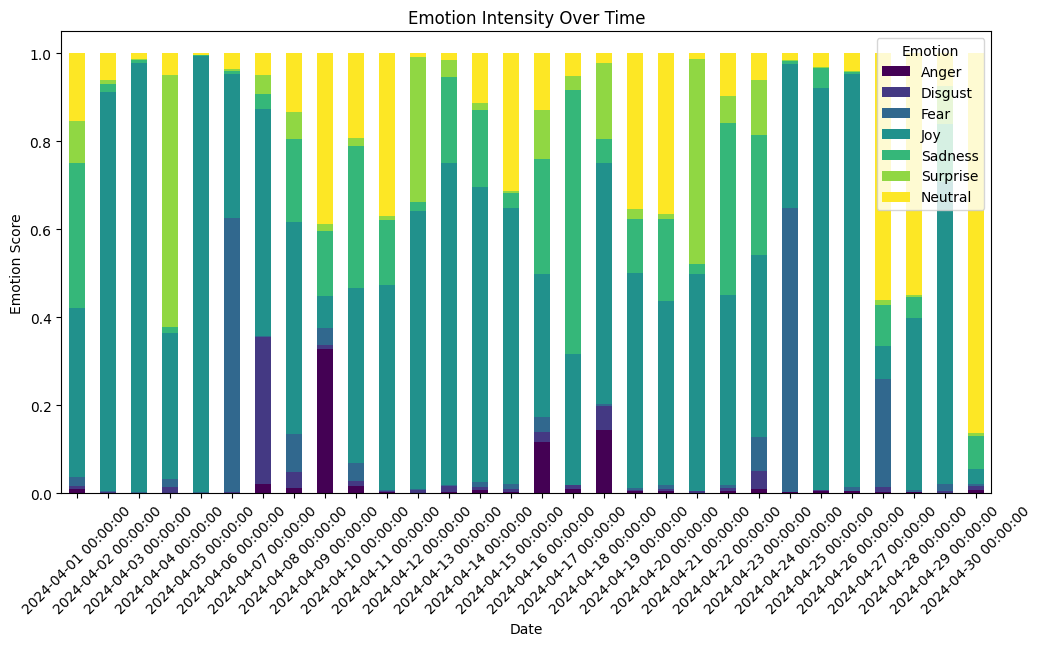

In [7]:
# Group by Date and sum up emotion scores
emotion_trends = df.groupby("Date")[["Anger", "Disgust", "Fear", "Joy", "Sadness", "Surprise", "Neutral"]].mean()

# Plot Stacked Bar Chart
emotion_trends.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Emotion Intensity Over Time")
plt.xlabel("Date")
plt.ylabel("Emotion Score")
plt.xticks(rotation=45)
plt.legend(title="Emotion")
plt.show()

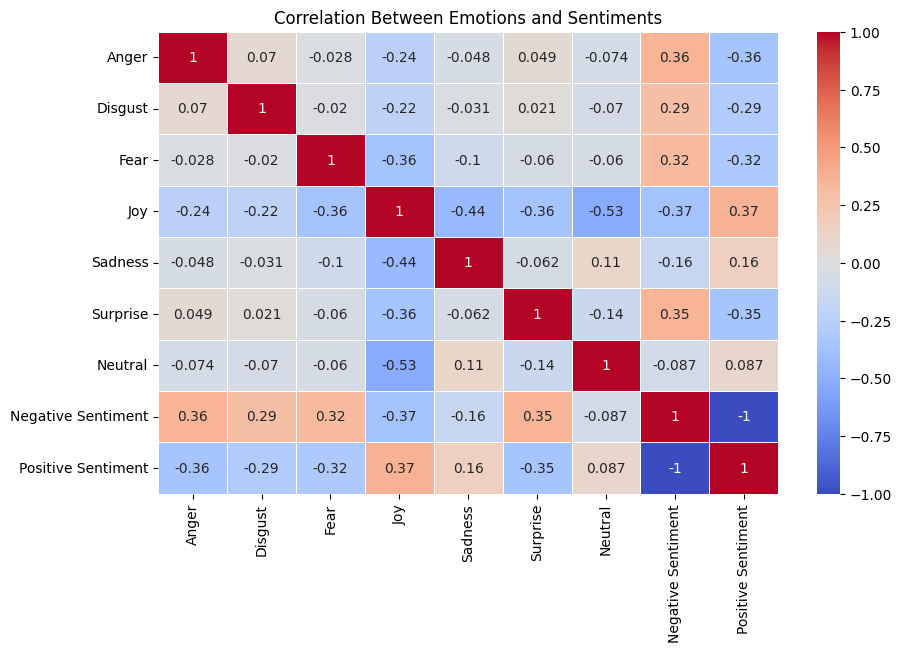

In [8]:
# Compute correlation matrix
corr = df[["Anger", "Disgust", "Fear", "Joy", "Sadness", "Surprise", "Neutral", "Negative Sentiment", "Positive Sentiment"]].corr()

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Emotions and Sentiments")
plt.show()

/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_21922/3117858996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_avg.index, y=emotion_avg.values, palette="coolwarm")


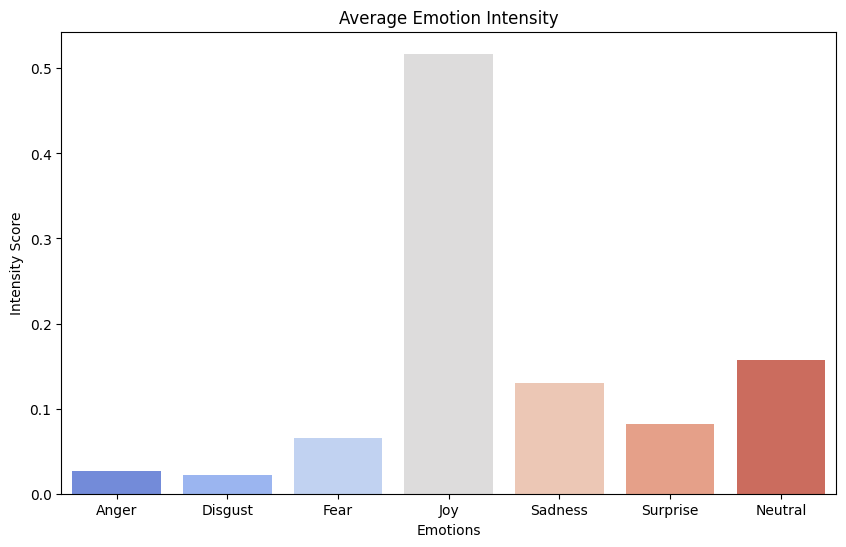

In [13]:
# Calculate the average intensity of emotions
emotion_avg = df[["Anger", "Disgust", "Fear", "Joy", "Sadness", "Surprise", "Neutral"]].mean()

# Plot bar chart of emotions
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_avg.index, y=emotion_avg.values, palette="coolwarm")
plt.title("Average Emotion Intensity")
plt.xlabel("Emotions")
plt.ylabel("Intensity Score")
plt.show()

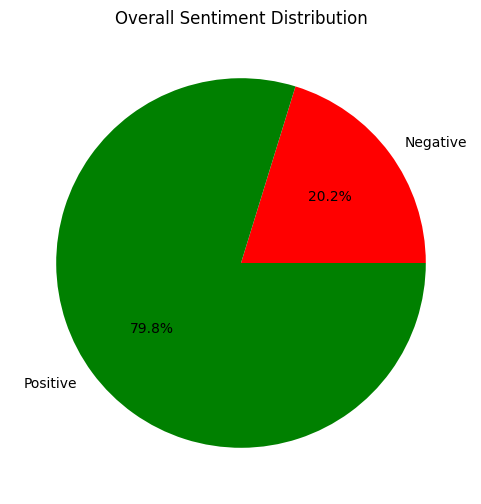

In [16]:
# Sum up positive and negative sentiment scores
sentiment_sums = df[["Negative Sentiment", "Positive Sentiment"]].sum()

# Pie chart for sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_sums, labels=["Negative", "Positive"], autopct="%1.1f%%", colors=["red", "green"])
plt.title("Overall Sentiment Distribution")
plt.show()

/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_21922/2827967048.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_happy.index.strftime('%Y-%m-%d'), y=top_5_happy["Joy"], palette="Blues_r")


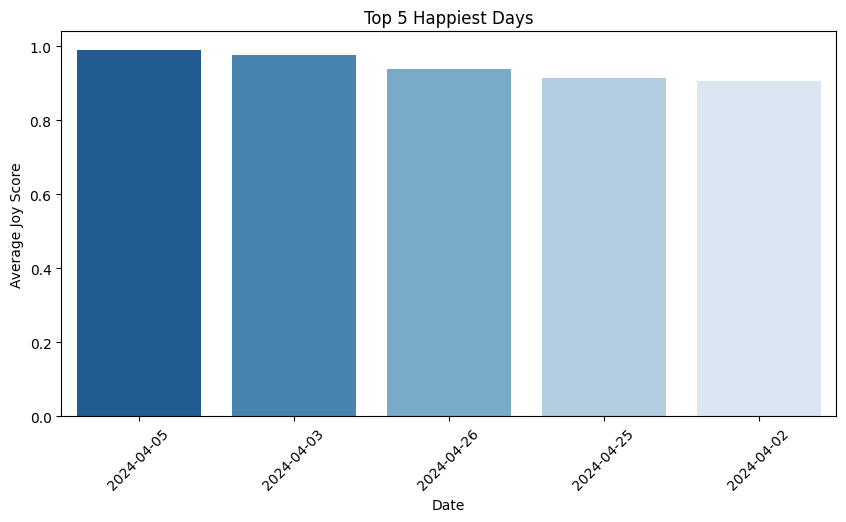

/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_21922/2827967048.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_sad.index.strftime('%Y-%m-%d'), y=top_5_sad["Sadness"], palette="Reds_r")


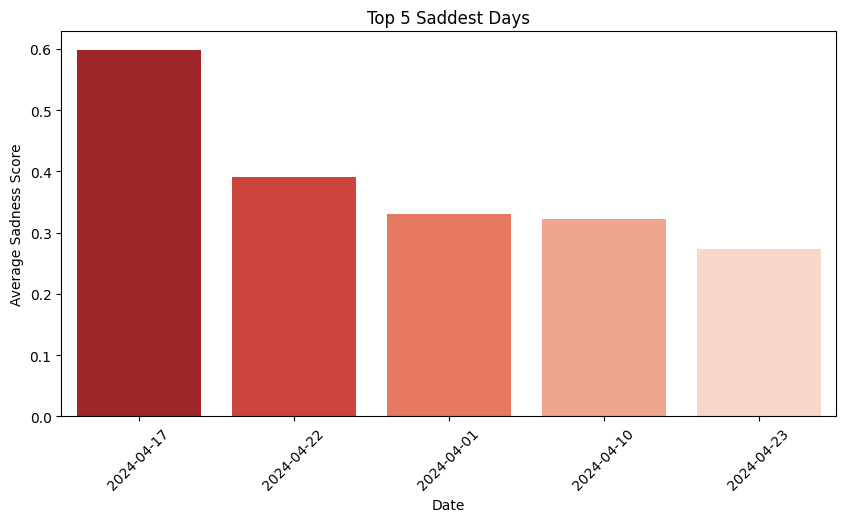

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Group by Date and calculate the mean for emotions
daily_emotion_avg = df.groupby("Date")[["Joy", "Sadness"]].mean()

# Get top 5 happiest days
top_5_happy = daily_emotion_avg.nlargest(5, "Joy")

# Get top 5 saddest days
top_5_sad = daily_emotion_avg.nlargest(5, "Sadness")

# Plot Top 5 Happiest Days
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_happy.index.strftime('%Y-%m-%d'), y=top_5_happy["Joy"], palette="Blues_r")
plt.title("Top 5 Happiest Days")
plt.xlabel("Date")
plt.ylabel("Average Joy Score")
plt.xticks(rotation=45)
plt.show()

# Plot Top 5 Saddest Days
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_sad.index.strftime('%Y-%m-%d'), y=top_5_sad["Sadness"], palette="Reds_r")
plt.title("Top 5 Saddest Days")
plt.xlabel("Date")
plt.ylabel("Average Sadness Score")
plt.xticks(rotation=45)
plt.show()

/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_21922/2479432223.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.index.strftime('%Y-%m-%d'), y=top_5[emotion], palette="viridis", ax=axes[i])
/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_21922/2479432223.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.index.strftime('%Y-%m-%d'), y=top_5[emotion], palette="viridis", ax=axes[i])
/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_21922/2479432223.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn

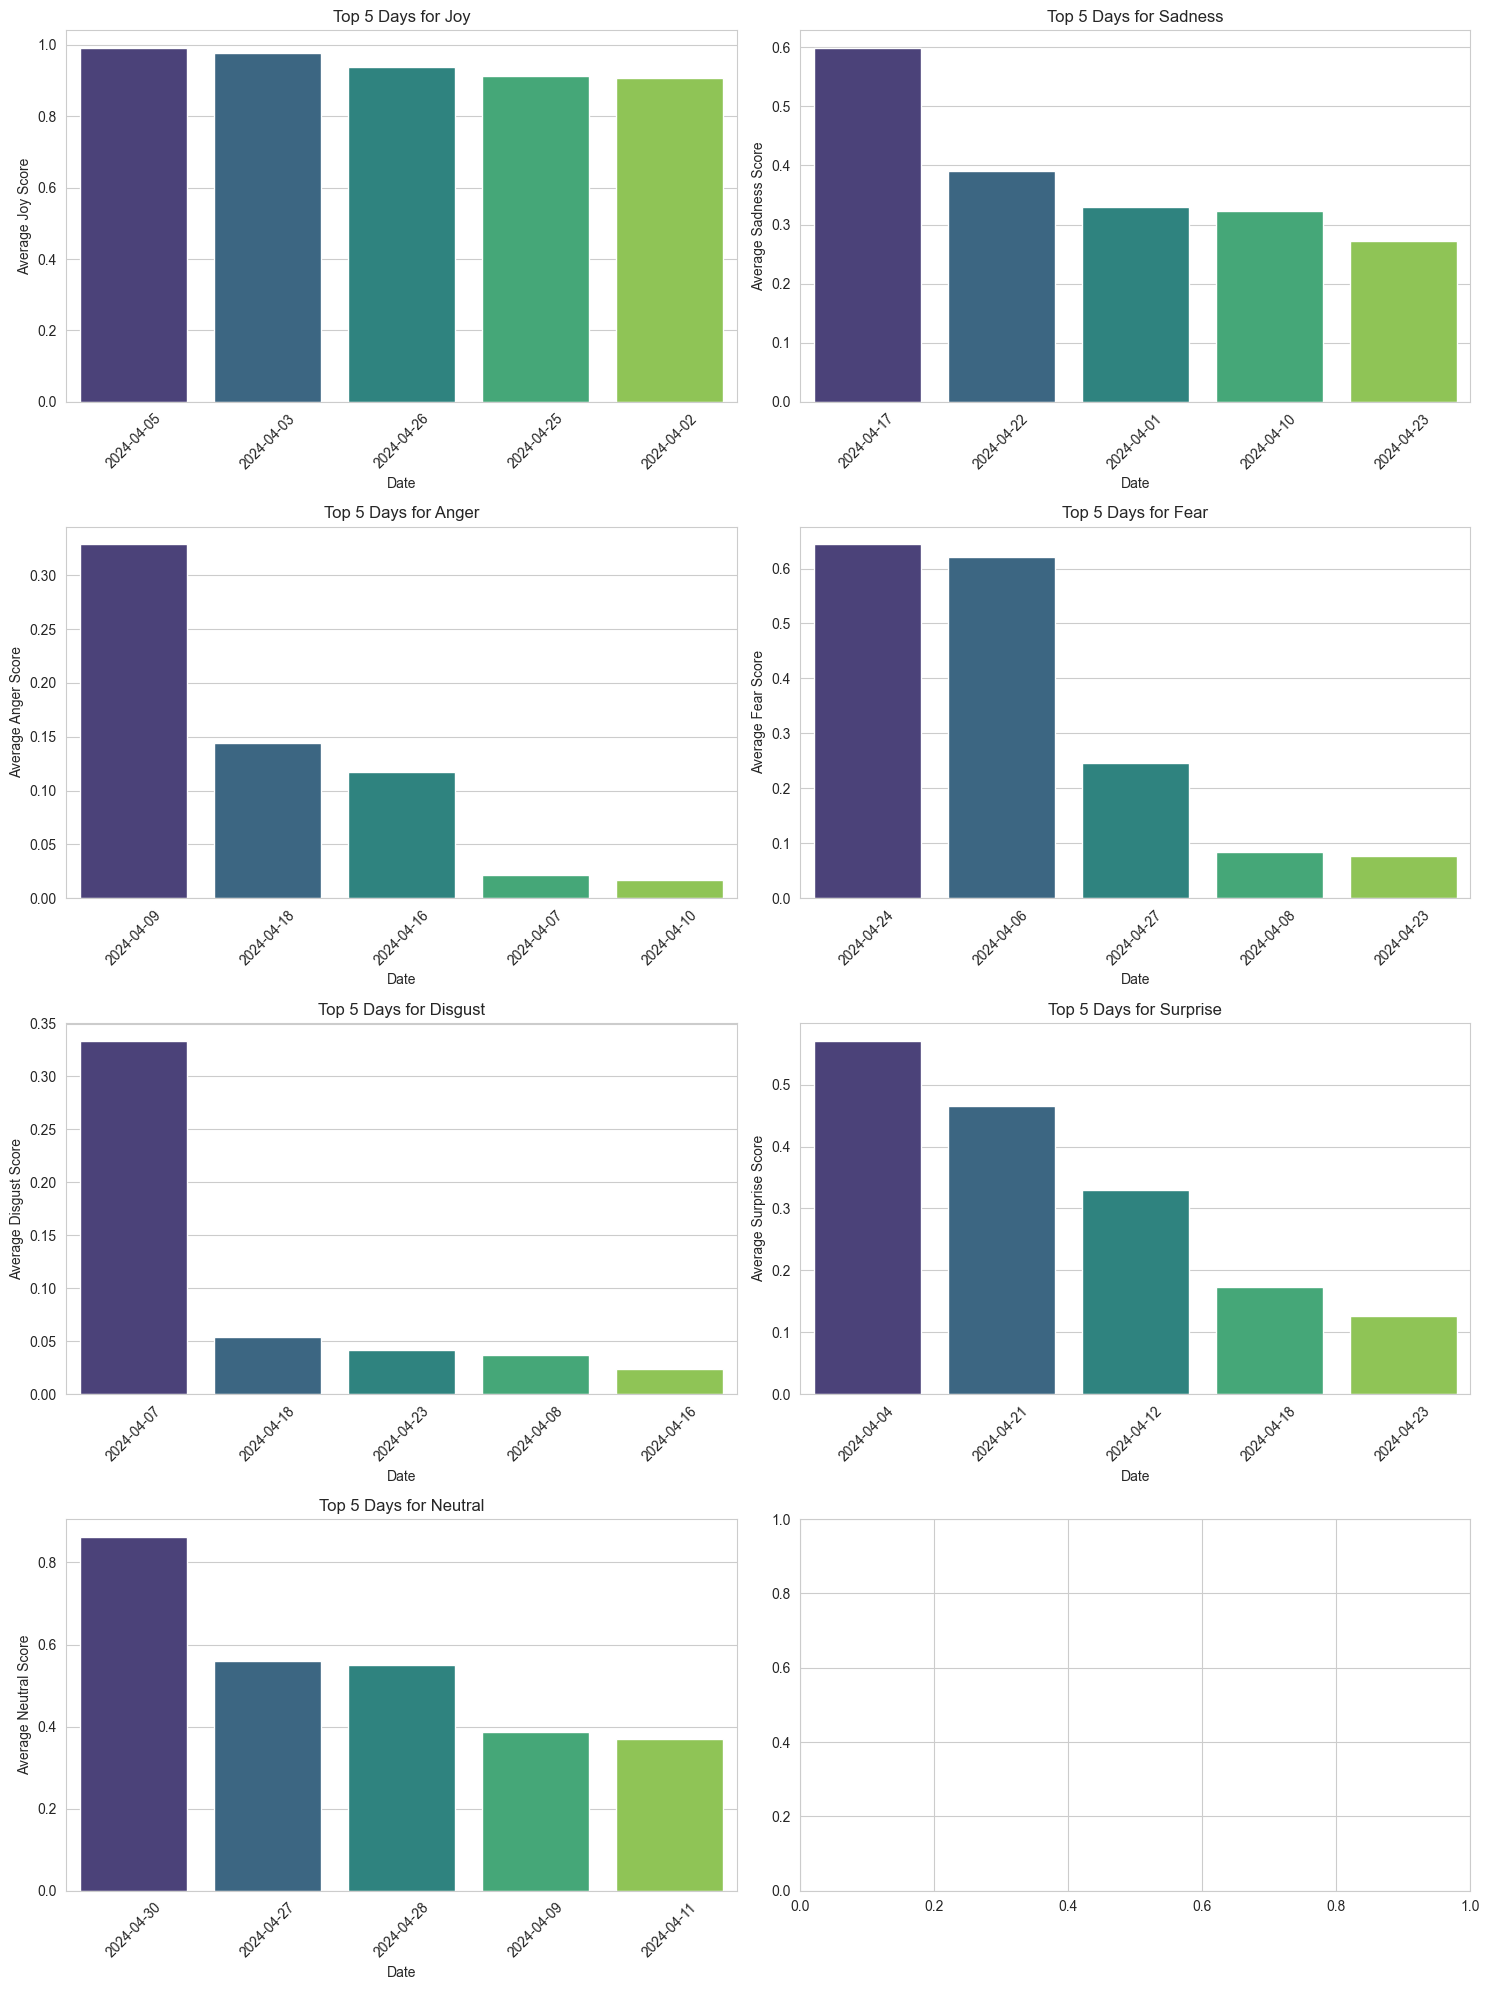

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset)

# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# List of emotion columns
emotions = ["Joy", "Sadness", "Anger", "Fear", "Disgust", "Surprise", "Neutral"]

# Group by Date and calculate the mean for each emotion
daily_emotion_avg = df.groupby("Date")[emotions].mean()

# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Iterate through each emotion and plot top 5 days
for i, emotion in enumerate(emotions):
    top_5 = daily_emotion_avg.nlargest(5, emotion)  # Get top 5 days
    sns.barplot(x=top_5.index.strftime('%Y-%m-%d'), y=top_5[emotion], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Top 5 Days for {emotion}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(f"Average {emotion} Score")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()